In [29]:
import sys
sys.path.append('../../')

In [30]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [31]:
import working_mem_benchmarks
reload(working_mem_benchmarks)

<module 'working_mem_benchmarks' from 'working_mem_benchmarks.py'>

In [ ]:
def objective(x):
    vals = working_mem_benchmarks.Working_Memory().run(
        input_scale = x['input_scale'],
        intercept_low = x['intercept_low'],
        intercept_high = x['intercept_high'],
        tau_input = x['tau_input'],
        tau_recurrent = x['tau_recurrent'],
        tau_reset = x['tau_reset'],
        max_rate_high = x['max_rate_high'],
        max_rate_low = x['max_rate_low']
    )
    return{
        'loss':
            abs(vals['act_510'] - 28) + abs(vals['act_1750'] - 33) + abs(vals['peak'] - 53),
        'status':hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
           space = {'input_scale':hp.uniform('input_scale', 0.1, 10),
                    'intercept_low':hp.uniform('intercept_low', -0.5, 0.5),
                    'intercept_high':hp.uniform('intercept_high', 0.5, 1.0),
                    'tau_input':hp.uniform('tau_input', 0.002, 0.2),
                    'tau_recurrent':hp.uniform('tau_recurrent', 0.002, 0.2),
                    'tau_reset':hp.uniform('tau_reset', 0.002, 0.2),
                    'max_rate_high':hp.uniform('max_rate_high', 150, 250),
                    'max_rate_low':hp.uniform('max_rate_low', 100, 150)
                   },
           algo = hyperopt.tpe.suggest,
           max_evals = 1000,
           trials = trials
           )
pickle.dump({'Trials':trials, 'Best':best}, open('wm_data_filter4', 'w'))

In [50]:
best2 = pickle.load(open('wm_data_filter0', 'r'))['Best']

print "Optimal values for filter_threshold = 0.2 are", best4
print #
print "Optimal values for filter_threshold = 0.4 are", best

Optimal values for filter_threshold = 0.2 are {'max_rate_high': 197.19119519297644, 'intercept_low': -0.4992744299277808, 'intercept_high': 0.809991052831423, 'input_scale': 0.3833780061255102, 'max_rate_low': 119.17285810399966, 'tau_reset': 0.07956492225081398, 'tau_recurrent': 0.19573723138942678, 'tau_input': 0.013502354155587815}

Optimal values for filter_threshold = 0.4 are {'max_rate_high': 236.700401176162, 'intercept_low': -0.4986753102824562, 'intercept_high': 0.5627377682692168, 'input_scale': 0.1086521264298292, 'max_rate_low': 148.35745250164726, 'tau_reset': 0.10423573561783896, 'tau_recurrent': 0.18286600309425424, 'tau_input': 0.00222577425747703}


I accidentally wrote over the file that contained optimal values for filter_threshold = 0. I still have them though, here they are:
        
        input_scale = 0.38314316705290097
        intercept_low = -0.4989080091138938
        intercept_high = 0.5963158879085206
        tau_input = 0.009683186948674292
        tau_recurrent = 0.1959772077772586
        tau_reset = 0.1376503648029975
        max_rate_high = 225.01822297425895
        max_rate_low = 130.69268975236358

In [51]:
import pandas
import seaborn as sns

In [53]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)
df = df.loc[df._filter_threshold ==0.0]

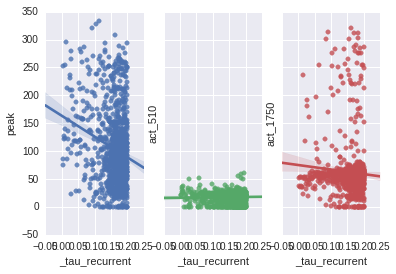

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_tau_recurrent'
sns.regplot(x, y = 'peak', ax = ax1, data = df)
sns.regplot(x, y = 'act_510', ax = ax2, data = df)
sns.regplot(x, y = 'act_1750', ax = ax3, data = df)

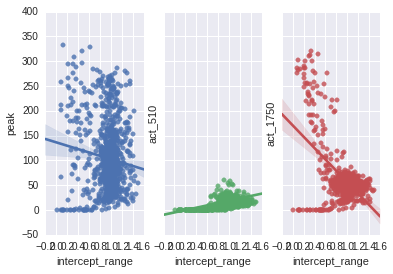

In [55]:
df['intercept_range'] = df['_intercept_high']-df['_intercept_low']
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = 'intercept_range'
sns.regplot(x, y = 'peak', ax = ax1, data = df)
sns.regplot(x, y = 'act_510', ax = ax2, data = df)
sns.regplot(x, y = 'act_1750', ax = ax3, data = df)

The following is the data from the filter threshold fixed at 0.2.

In [56]:
df = pandas.DataFrame(data.data)
df = df.loc[df._filter_threshold ==0.2]

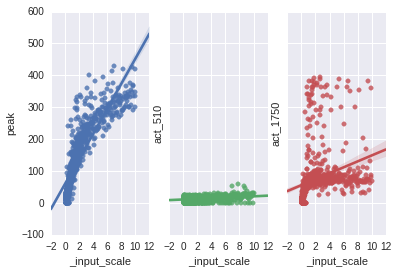

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_input_scale'
sns.regplot(x, y = 'peak', ax = ax1, data = df)
sns.regplot(x, y = 'act_510', ax = ax2, data = df)
sns.regplot(x, y = 'act_1750', ax = ax3, data = df)